In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [150]:
amazon_feedback_raw = pd.read_csv("/Users/saurabh/Documents/sentimentLabelledSentences/amazon_cells_labelled.txt", delimiter= '\t', header=None)
amazon_feedback_raw.columns = ['message', 'feedback']
amazon_feedback_temp = amazon_feedback_raw
print(amazon_feedback_raw.head(2000))

                                               message  feedback
0    So there is no way for me to plug it in here i...         0
1                          Good case, Excellent value.         1
2                               Great for the jawbone.         1
3    Tied to charger for conversations lasting more...         0
4                                    The mic is great.         1
5    I have to jiggle the plug to get it to line up...         0
6    If you have several dozen or several hundred c...         0
7          If you are Razr owner...you must have this!         1
8                  Needless to say, I wasted my money.         0
9                     What a waste of money and time!.         0
10                     And the sound quality is great.         1
11   He was very impressed when going from the orig...         1
12   If the two were seperated by a mere 5+ ft I st...         0
13                            Very good quality though         1
14   The design is very o

At the most obvious level, a feature from the message can be whether it contains a given word. Let's add those columns to our dataframe. The words chosen below are simply intuited as possibly having something to do with positive feedback. 

In [132]:
keywords = ['Good', 'Excellent', 'Great', 'impressed', 'Highly', 'recommend', 'SWEETEST', 'fine', 'Loved', 'free']

for key in keywords:
    amazon_feedback_raw[str(key)] = amazon_feedback_raw.message.str.contains(''+str(key)+'', case=False)

#print(feedback_raw)

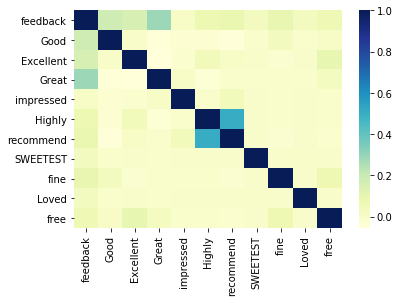

In [133]:
sns.heatmap(amazon_feedback_raw.corr(), cmap="YlGnBu")

That is actually a great looking plot for us. Most of the words show strong independence from each other. The only exceptions are highly:recommend and great:feedback. For now, let's keep everything in the dataset.

In [134]:
data = amazon_feedback_raw[keywords]
target = amazon_feedback_raw['feedback']

In [135]:
from sklearn.naive_bayes import GaussianNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.

print("Number of mislabeled points out of total {} points:{}".format(data.shape[0], (target != y_pred).sum()))


Number of mislabeled points out of total 1000 points:364


After adding new keywords like 'very impressed','no problems' does not affect result but keywords like  'love', 'happy','wise', 'WORTHWHILE' reduced the result while keywords like 'like' improved the result specially has impact on performance

In [48]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.605
Testing on Sample: 0.636


These scores look really consistent! It doesn't seem like our model is overfitting. 

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.69, 0.66, 0.62, 0.64, 0.65, 0.6 , 0.63, 0.62, 0.63, 0.58])

That's exactly what we'd hope to see. The array that cross_val_score returns is a series of accuracy scores with a different hold out group each time. If our model is overfitting at a variable amount, those scores will fluctuate. Instead, ours are relatively consistent.

In [151]:
keywords = ['Good', 'impressed', 'Highly', 'recommend', 'SWEETEST', 'fine', 'Loved', 'free', 'good quality']

for key in keywords:
    amazon_feedback_temp[str(key)] = amazon_feedback_temp.message.str.contains(''+str(key)+'', case=False)

#print(feedback_raw)

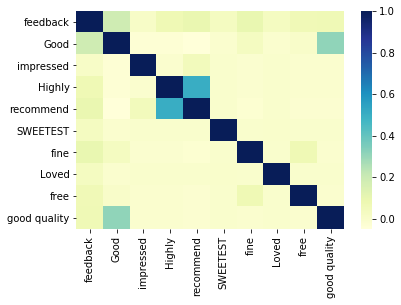

In [152]:
sns.heatmap(amazon_feedback_temp.corr(), cmap="YlGnBu")

In [153]:
data1 = amazon_feedback_temp[keywords]
target1 = amazon_feedback_temp['feedback']

In [154]:
from sklearn.naive_bayes import GaussianNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data1, target1)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data1)

# Display our results.

print("Number of mislabeled points out of total {} points:{}".format(data1.shape[0], (target1 != y_pred).sum()))



Number of mislabeled points out of total 1000 points:461


In [155]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data1, target1, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data1, target1).score(data1, target1)))

With 20% Holdout: 0.515
Testing on Sample: 0.539


In [156]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.69, 0.66, 0.62, 0.64, 0.65, 0.6 , 0.63, 0.62, 0.63, 0.58])

if we remove  'Great','Excellent' two features that has most impact on performance